# PROJECT OBJECTIVE
To Analyze warehouse and retail sales data for understanding sales patterns by year, month, item type, and supplier using Pandas filtering and basic Matplotlib visualizations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
url='https://data.montgomerycountymd.gov/api/views/v76h-r7br/rows.csv?accessType=DOWNLOAD'
df=pd.read_csv(url)
df.head(10)

YEAR  MONTH                           SUPPLIER ITEM CODE  \
0  2020      1  REPUBLIC NATIONAL DISTRIBUTING CO    100009   
1  2020      1                          PWSWN INC    100024   
2  2020      1            RELIABLE CHURCHILL LLLP      1001   
3  2020      1          LANTERNA DISTRIBUTORS INC    100145   
4  2020      1               DIONYSOS IMPORTS INC    100293   
5  2020      1            KYSELA PERE ET FILS LTD    100641   
6  2020      1           SANTA MARGHERITA USA INC    100749   
7  2020      1   BROWN-FORMAN BEVERAGES WORLDWIDE      1008   
8  2020      1                 JIM BEAM BRANDS CO     10103   
9  2020      1          INTERNATIONAL CELLARS LLC    101117   

                                    ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
0                                BOOTLEG RED - 750ML      WINE          0.00   
1                          MOMENT DE PLAISIR - 750ML      WINE          0.00   
2                S SMITH ORGANIC PEAR CIDER - 18.7OZ      BEER          0.00   
3                      SCHLINK HAUS KABINETT - 750ML      WINE          0.00   
4                     SANTORINI GAVALA WHITE - 750ML      WINE          0.82   
5                    CORTENOVA VENETO P/GRIG - 750ML      WINE          2.76   
6               SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.08   
7  JACK DANIELS COUNTRY COCKTAIL SOUTHERN PEACH -...      BEER          0.00   
8              KNOB CREEK BOURBON 9YR - 100P - 375ML    LIQUOR          6.41   
9                                  KSARA CAB - 750ML      WINE          0.33   

   RETAIL TRANSFERS  WAREHOUSE SALES  
0               0.0              2.0  
1               1.0              4.0  
2               0.0              1.0  
3               0.0              1.0  
4               0.0              0.0  
5               0.0              6.0  
6               1.0              1.0  
7               0.0              2.0  
8               4.0              0.0  
9               1.0              2.0

YEAR → year of sales

MONTH → month of sales

SUPPLIER → company supplying the item

ITEM CODE → unique product identifier

ITEM DESCRIPTION → product name

ITEM TYPE → category (WINE, BEER, LIQUOR)

RETAIL SALES → sales through retail stores

RETAIL TRANSFERS → internal transfers

WAREHOUSE SALES → warehouse level sales

In [ ]:
df['ITEM TYPE'].to_string()

'0                 WINE\n1                 WINE\n2                 BEER\n3                 WINE\n4                 WINE\n5                 WINE\n6                 WINE\n7                 BEER\n8               LIQUOR\n9                 WINE\n10              LIQUOR\n11              LIQUOR\n12              LIQUOR\n13              LIQUOR\n14                WINE\n15                WINE\n16                WINE\n17                WINE\n18                WINE\n19                WINE\n20                WINE\n21                WINE\n22              LIQUOR\n23                WINE\n24        STR_SUPPLIES\n25                WINE\n26                WINE\n27                WINE\n28              LIQUOR\n29                WINE\n30              LIQUOR\n31                WINE\n32              LIQUOR\n33                BEER\n34              LIQUOR\n35              LIQUOR\n36              LIQUOR\n37              LIQUOR\n38                WINE\n39                WINE\n40              LIQUOR\n41             

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [ ]:
df.describe()

YEAR          MONTH   RETAIL SALES  RETAIL TRANSFERS  \
count  307645.000000  307645.000000  307642.000000     307645.000000   
mean     2018.438525       6.423862       7.024071          6.936465   
std         1.083061       3.461812      30.986238         30.237195   
min      2017.000000       1.000000      -6.490000        -38.490000   
25%      2017.000000       3.000000       0.000000          0.000000   
50%      2019.000000       7.000000       0.320000          0.000000   
75%      2019.000000       9.000000       3.267500          3.000000   
max      2020.000000      12.000000    2739.000000       1990.830000   

       WAREHOUSE SALES  
count    307645.000000  
mean         25.294597  
std         249.916798  
min       -7800.000000  
25%           0.000000  
50%           1.000000  
75%           5.000000  
max       18317.000000

# **DATA CLEANING**

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df.duplicated()
df.drop_duplicates(inplace=True)

In [ ]:
df['MONTH']=pd.to_numeric(df['MONTH'])
df['YEAR']=pd.to_numeric(df['YEAR'])

In [ ]:
df['RETAIL SALES']=pd.to_numeric(df['RETAIL SALES'])
df['RETAIL TRANSFERS']=pd.to_numeric(df['RETAIL TRANSFERS'])
df['WAREHOUSE SALES']=pd.to_numeric(df['WAREHOUSE SALES'])

In [ ]:
df=df[df['RETAIL SALES'] != 0]
df=df[df['WAREHOUSE SALES'] != 0]


In [ ]:
typo_check=df['ITEM TYPE'].value_counts()
typo_check

ITEM TYPE
WINE            187640
LIQUOR           64910
BEER             42413
KEGS             10146
NON-ALCOHOL       1899
STR_SUPPLIES       318
REF                 79
DUNNAGE             72
Name: count, dtype: int64

The above output shows the count of all the values in ITEM TYPE column, and therefore also shows that there are no typos in item types.

In [ ]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

# Data Selection And Filtering


Filtering By Year


In [ ]:
sales_2017=df[df['YEAR']==2017]
sales_2017.head()

YEAR  MONTH                           SUPPLIER ITEM CODE  \
34708  2017      6               DIONYSOS IMPORTS INC    100293   
34709  2017      6            KYSELA PERE ET FILS LTD    100641   
34712  2017      6  REPUBLIC NATIONAL DISTRIBUTING CO    100803   
34722  2017      6                            MHW LTD    316291   
34731  2017      6                       HEINEKEN USA      7803   

                      ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
34708   SANTORINI GAVALA WHITE - 750ML      WINE          0.56   
34709  CORTENOVA VENETO P/GRIG - 750ML      WINE          0.40   
34712      CYT XPLORADOR CHARD - 750ML      WINE          0.24   
34722         PIGGY BANK S/BLC - 750ML      WINE          0.33   
34731             HEINEKEN 4/6NR - 7OZ      BEER         87.25   

       RETAIL TRANSFERS  WAREHOUSE SALES  
34708               0.0            10.00  
34709               2.0            17.00  
34712               0.0             4.00  
34722               0.0             4.00  
34731              97.0           221.75

In [ ]:
sales_2018=df[df['YEAR']==2018]
sales_2018.head()

YEAR  MONTH                           SUPPLIER ITEM CODE  \
130858  2018      1                    BACARDI USA INC     10332   
130994  2018      1               DIONYSOS IMPORTS INC    100293   
130995  2018      1            KYSELA PERE ET FILS LTD    100641   
130998  2018      1  REPUBLIC NATIONAL DISTRIBUTING CO    100927   
130999  2018      1            CLIPPER CITY BREWING CO     10095   

                       ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
130858         GREY GOOSE VODKA - 375ML    LIQUOR         13.52   
130994   SANTORINI GAVALA WHITE - 750ML      WINE          0.92   
130995  CORTENOVA VENETO P/GRIG - 750ML      WINE          0.41   
130998        CRISTALINO EX/DRY - 750ML      WINE          0.58   
130999    HEAVY SEAS AMERICANNON 4/6 NR      BEER         25.25   

        RETAIL TRANSFERS  WAREHOUSE SALES  
130858              21.0              1.0  
130994               0.0              8.0  
130995               0.0              5.0  
130998               0.0              1.0  
130999              58.0             81.0

In [ ]:
sales_2019=df[df['YEAR']==2019]
sales_2019.head()

YEAR  MONTH                  SUPPLIER ITEM CODE  \
157432  2019      1     YOUNG WON TRADING INC     10346   
157444  2019      1  SANTA MARGHERITA USA INC    100749   
157446  2019      1   CLIPPER CITY BREWING CO     10095   
157456  2019      1     A VINTNERS SELECTIONS    101532   
157458  2019      1           ROYAL WINE CORP    101664   

                            ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
157432                     KLOUD - 330/24 NR      BEER          3.75   
157444  SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.40   
157446         HEAVY SEAS AMERICANNON 4/6 NR      BEER          5.00   
157456    HATSUMAGO SAKE JUN MAI SHU - 720ML      WINE          1.02   
157458           RAMON CORDOVA RIOJA - 750ML      WINE          0.16   

        RETAIL TRANSFERS  WAREHOUSE SALES  
157432              11.0             12.0  
157444               2.0              2.0  
157446               5.0              3.0  
157456               1.0              3.0  
157458               0.0              3.0

In [ ]:
sales_2020=df[df['YEAR']==2020]
sales_2020.head()

YEAR  MONTH                              SUPPLIER ITEM CODE  \
5   2020      1               KYSELA PERE ET FILS LTD    100641   
6   2020      1              SANTA MARGHERITA USA INC    100749   
9   2020      1             INTERNATIONAL CELLARS LLC    101117   
16  2020      1  THE COUNTRY VINTNER, LLC DBA WINEBOW    101532   
17  2020      1                       ROYAL WINE CORP    101664   

                        ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
5        CORTENOVA VENETO P/GRIG - 750ML      WINE          2.76   
6   SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.08   
9                      KSARA CAB - 750ML      WINE          0.33   
16    HATSUMAGO SAKE JUN MAI SHU - 720ML      WINE          0.34   
17           RAMON CORDOVA RIOJA - 750ML      WINE          0.16   

    RETAIL TRANSFERS  WAREHOUSE SALES  
5                0.0              6.0  
6                1.0              1.0  
9                1.0              2.0  
16               1.0              1.0  
17               0.0              2.0

Filtering By Item Type

In [ ]:
Wine_sales=df[df['ITEM TYPE']=='WINE']
Wine_sales.head()

YEAR  MONTH                              SUPPLIER ITEM CODE  \
5   2020      1               KYSELA PERE ET FILS LTD    100641   
6   2020      1              SANTA MARGHERITA USA INC    100749   
9   2020      1             INTERNATIONAL CELLARS LLC    101117   
16  2020      1  THE COUNTRY VINTNER, LLC DBA WINEBOW    101532   
17  2020      1                       ROYAL WINE CORP    101664   

                        ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
5        CORTENOVA VENETO P/GRIG - 750ML      WINE          2.76   
6   SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.08   
9                      KSARA CAB - 750ML      WINE          0.33   
16    HATSUMAGO SAKE JUN MAI SHU - 720ML      WINE          0.34   
17           RAMON CORDOVA RIOJA - 750ML      WINE          0.16   

    RETAIL TRANSFERS  WAREHOUSE SALES  
5                0.0              6.0  
6                1.0              1.0  
9                1.0              2.0  
16               1.0              1.0  
17               0.0              2.0

In [ ]:
Beer_sales=df[df['ITEM TYPE']=='BEER']
Beer_sales.head()

YEAR  MONTH                       SUPPLIER ITEM CODE  \
42  2020      1          YOUNG WON TRADING INC     10346   
54  2020      1  BUCK DISTRIBUTING COMPANY INC     10430   
56  2020      1    VICTORY BREWING COMPANY LLC     10431   
57  2020      1           DIONYSOS IMPORTS INC     10432   
58  2020      1                    LEGENDS LTD     10434   

                ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  \
42             KLOUD - 330/24 NR      BEER          2.75               2.0   
54       STONE IPA 4/6 NR - 12OZ      BEER         33.79              45.0   
56  VICTORY GOLDEN MONKEY 4/6 NR      BEER         16.75              19.0   
57    MYTHOS BEER 4/6NR - 11.2OZ      BEER          1.50               0.0   
58   LAGUNITAS IPA 4/6 NR - 12OZ      BEER         63.50              63.0   

    WAREHOUSE SALES  
42             7.00  
54           120.75  
56           191.00  
57            35.00  
58           210.00

In [ ]:
Alcohol_sales=df[df['ITEM TYPE']=='LIQUOR']
Alcohol_sales.head()

YEAR  MONTH                              SUPPLIER ITEM CODE  \
66  2020      1                 PERNOD RICARD USA LLC     10442   
67  2020      1                 PERNOD RICARD USA LLC     10443   
69  2020      1  THE COUNTRY VINTNER, LLC DBA WINEBOW     10445   
90  2020      1              DIAGEO NORTH AMERICA INC     10634   
97  2020      1                    JIM BEAM BRANDS CO     10668   

                       ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
66     OLMECA ALTOS TEQ - PLATA - 750ML    LIQUOR         20.95   
67  OLMECA ALTOS TEQ - REPOSADO - 750ML    LIQUOR         20.70   
69         BRECKENRIDGE BOURBON - 750ML    LIQUOR         12.07   
90         SMIRNOFF VODKA - CHERRY - 1L    LIQUOR          7.02   
97          MAKERS MARK BOURBON - 375ML    LIQUOR         26.25   

    RETAIL TRANSFERS  WAREHOUSE SALES  
66             34.00              4.0  
67             38.00              2.0  
69             11.00              2.0  
90              8.75              1.0  
97             21.00              1.0

In [ ]:
Non_alcohol_sales=df[df['ITEM TYPE']!='LIQUOR']
Non_alcohol_sales.head()

YEAR  MONTH                              SUPPLIER ITEM CODE  \
5   2020      1               KYSELA PERE ET FILS LTD    100641   
6   2020      1              SANTA MARGHERITA USA INC    100749   
9   2020      1             INTERNATIONAL CELLARS LLC    101117   
16  2020      1  THE COUNTRY VINTNER, LLC DBA WINEBOW    101532   
17  2020      1                       ROYAL WINE CORP    101664   

                        ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
5        CORTENOVA VENETO P/GRIG - 750ML      WINE          2.76   
6   SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.08   
9                      KSARA CAB - 750ML      WINE          0.33   
16    HATSUMAGO SAKE JUN MAI SHU - 720ML      WINE          0.34   
17           RAMON CORDOVA RIOJA - 750ML      WINE          0.16   

    RETAIL TRANSFERS  WAREHOUSE SALES  
5                0.0              6.0  
6                1.0              1.0  
9                1.0              2.0  
16               1.0              1.0  
17               0.0              2.0

# GROUPING AND AGGREGRATION


Total sale per year

In [ ]:
Year_wise_sales=df.groupby('YEAR')
Year_wise_sales['RETAIL SALES'].sum()

YEAR
2017    553154.22
2018    123600.85
2019    797179.39
2020    280657.46
Name: RETAIL SALES, dtype: float64

In [ ]:
Year_wise_sales['WAREHOUSE SALES'].sum()

YEAR
2017    1791192.65
2018     396712.75
2019    2677383.15
2020    1142585.45
Name: WAREHOUSE SALES, dtype: float64

Total sale per item

In [ ]:
Item_wise_sales=df.groupby('ITEM TYPE')
Item_wise_sales['RETAIL SALES'].sum()

ITEM TYPE
BEER           568343.01
LIQUOR         464355.49
NON-ALCOHOL     21709.87
WINE           700183.55
Name: RETAIL SALES, dtype: float64

In [ ]:
Item_wise_sales['WAREHOUSE SALES'].sum()

ITEM TYPE
BEER           5013813.36
LIQUOR           91759.61
NON-ALCOHOL      25160.59
WINE            877140.44
Name: WAREHOUSE SALES, dtype: float64

Total Warehouse sales by month


In [ ]:
monthly_sales=df.groupby('MONTH')
monthly_sales['WAREHOUSE SALES'].sum()

MONTH
1     624068.66
2     383396.04
3     468220.73
4     218665.97
5     290831.54
6     532309.25
7     885332.28
8     565590.58
9     790316.88
10    500162.48
11    503448.54
12    245531.05
Name: WAREHOUSE SALES, dtype: float64

In [ ]:
total_monthly_sales=monthly_sales[['RETAIL SALES','WAREHOUSE SALES']].sum()
total_monthly_sales

RETAIL SALES  WAREHOUSE SALES
MONTH                               
1         182165.10        624068.66
2         128758.85        383396.04
3         157678.15        468220.73
4          66631.27        218665.97
5          80536.17        290831.54
6         154206.02        532309.25
7         223472.55        885332.28
8         146380.75        565590.58
9         205027.77        790316.88
10        145028.27        500162.48
11        162722.22        503448.54
12        101984.80        245531.05

# Sorting and Ranking



In [ ]:
df_sorted_Wsales = df.sort_values(by='WAREHOUSE SALES', ascending= False)
df_sorted_Wsales.head()

YEAR  MONTH       SUPPLIER ITEM CODE              ITEM DESCRIPTION  \
13281   2020      7  CROWN IMPORTS     23445  CORONA EXTRA LOOSE NR - 12OZ   
234274  2019      7  CROWN IMPORTS     23445  CORONA EXTRA LOOSE NR - 12OZ   
209127  2019      5  CROWN IMPORTS     23445  CORONA EXTRA LOOSE NR - 12OZ   
104007  2017     11  CROWN IMPORTS     23445  CORONA EXTRA LOOSE NR - 12OZ   
48177   2017      6  CROWN IMPORTS     96750   CORONA EXTRA 2/12 NR - 12OZ   

       ITEM TYPE  RETAIL SALES  RETAIL TRANSFERS  WAREHOUSE SALES  
13281       BEER        1174.0            1041.0         18317.00  
234274      BEER        1198.0            1416.0         17810.87  
209127      BEER        1373.0            1207.0         17703.62  
104007      BEER         992.0             981.0         16079.12  
48177       BEER          53.0              61.0         15955.46

In [ ]:
df_sorted_Rsales = df.sort_values(by='RETAIL SALES', ascending= False)
df_sorted_Rsales.head()

YEAR  MONTH              SUPPLIER ITEM CODE  \
31165   2020      3  FIFTH GENERATION INC     53929   
253916  2019      8  FIFTH GENERATION INC     53929   
229078  2019      6  FIFTH GENERATION INC     53929   
127115  2017     12  FIFTH GENERATION INC     53929   
281562  2019     10  FIFTH GENERATION INC     53929   

                     ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
31165   TITO'S HANDMADE VODKA - 1.75L    LIQUOR       1816.49   
253916  TITO'S HANDMADE VODKA - 1.75L    LIQUOR       1752.45   
229078  TITO'S HANDMADE VODKA - 1.75L    LIQUOR       1710.80   
127115  TITO'S HANDMADE VODKA - 1.75L    LIQUOR       1616.60   
281562  TITO'S HANDMADE VODKA - 1.75L    LIQUOR       1615.23   

        RETAIL TRANSFERS  WAREHOUSE SALES  
31165            1990.83             10.0  
253916           1448.00             31.0  
229078           1470.17             22.0  
127115           1587.99             15.0  
281562           1462.00             23.0

In [ ]:
supplier_sales=df.groupby('SUPPLIER')['RETAIL SALES'].sum()
sorted_supplier_sales=supplier_sales.sort_values(ascending=False)
sorted_supplier_sales

SUPPLIER
E & J GALLO WINERY             146868.48
CONSTELLATION BRANDS           118434.00
ANHEUSER BUSCH INC             109558.65
DIAGEO NORTH AMERICA INC        99209.55
MILLER BREWING COMPANY          86989.53
                                 ...    
AIKO IMPORTERS INC                  0.32
WINERY EXCHANGE INC                 0.24
WILLIAMS CORNER WINE                0.24
FREE RUN WINE MERCHANTS LLC         0.08
NICKOLAS IMPORTS LLC                0.08
Name: RETAIL SALES, Length: 275, dtype: float64

In [ ]:
supplier_sales=df.groupby('SUPPLIER')['WAREHOUSE SALES'].sum()
sorted_supplier_sales=supplier_sales.sort_values(ascending=False)
sorted_supplier_sales

SUPPLIER
CROWN IMPORTS                             1389366.89
ANHEUSER BUSCH INC                         946485.80
MILLER BREWING COMPANY                     934382.73
HEINEKEN USA                               691897.97
E & J GALLO WINERY                         192755.86
                                             ...    
FREE RUN WINE MERCHANTS LLC                     1.00
CELICAR LLC DBA TWIN VALLEY DISTILLERS          1.00
NICKOLAS IMPORTS LLC                            1.00
CANTINIERE IMPORTS & DISTRIBUTING INC           1.00
BULLSHINE DISTILLERY LLC                        1.00
Name: WAREHOUSE SALES, Length: 275, dtype: float64

# DATA TRANSFORMATION AND FEATURE ENGINEERING


In [ ]:
df['TOTAL_SALES'] = (df['RETAIL SALES'] + df['WAREHOUSE SALES'])
df.head()

YEAR  MONTH                              SUPPLIER ITEM CODE  \
5   2020      1               KYSELA PERE ET FILS LTD    100641   
6   2020      1              SANTA MARGHERITA USA INC    100749   
9   2020      1             INTERNATIONAL CELLARS LLC    101117   
16  2020      1  THE COUNTRY VINTNER, LLC DBA WINEBOW    101532   
17  2020      1                       ROYAL WINE CORP    101664   

                        ITEM DESCRIPTION ITEM TYPE  RETAIL SALES  \
5        CORTENOVA VENETO P/GRIG - 750ML      WINE          2.76   
6   SANTA MARGHERITA P/GRIG ALTO - 375ML      WINE          0.08   
9                      KSARA CAB - 750ML      WINE          0.33   
16    HATSUMAGO SAKE JUN MAI SHU - 720ML      WINE          0.34   
17           RAMON CORDOVA RIOJA - 750ML      WINE          0.16   

    RETAIL TRANSFERS  WAREHOUSE SALES  TOTAL_SALES  
5                0.0              6.0         8.76  
6                1.0              1.0         1.08  
9                1.0              2.0         2.33  
16               1.0              1.0         1.34  
17               0.0              2.0         2.16

In [ ]:
totalsupplier_sales=df.groupby('SUPPLIER')['TOTAL_SALES'].sum()
sorted_totalsupplier_sales=supplier_sales.sort_values(ascending=False)
sorted_totalsupplier_sales

SUPPLIER
CROWN IMPORTS                             1389366.89
ANHEUSER BUSCH INC                         946485.80
MILLER BREWING COMPANY                     934382.73
HEINEKEN USA                               691897.97
E & J GALLO WINERY                         192755.86
                                             ...    
FREE RUN WINE MERCHANTS LLC                     1.00
CELICAR LLC DBA TWIN VALLEY DISTILLERS          1.00
NICKOLAS IMPORTS LLC                            1.00
CANTINIERE IMPORTS & DISTRIBUTING INC           1.00
BULLSHINE DISTILLERY LLC                        1.00
Name: WAREHOUSE SALES, Length: 275, dtype: float64

# BASIC DATA VISUALISATION


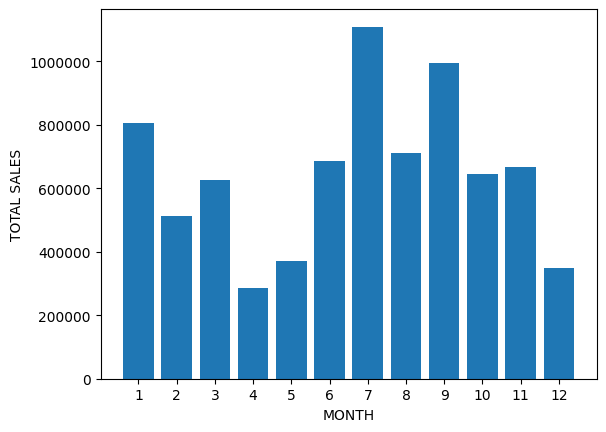

In [ ]:

TOTAL_SALES_BY_MONTH = df.groupby('MONTH')['TOTAL_SALES'].sum()
plt.bar(TOTAL_SALES_BY_MONTH.index.astype(str),TOTAL_SALES_BY_MONTH.values)
plt.xlabel('MONTH')
plt.ylabel('TOTAL SALES')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


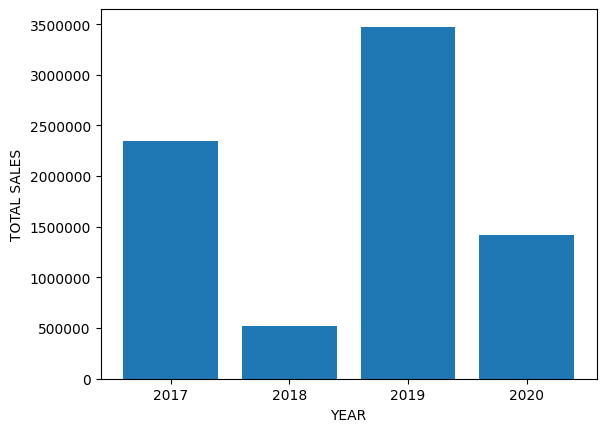

In [ ]:
TOTAL_SALES_BY_YEAR = df.groupby('YEAR')['TOTAL_SALES'].sum()
plt.bar(TOTAL_SALES_BY_YEAR.index.astype(str),TOTAL_SALES_BY_YEAR.values)
plt.xlabel('YEAR')
plt.ylabel('TOTAL SALES')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

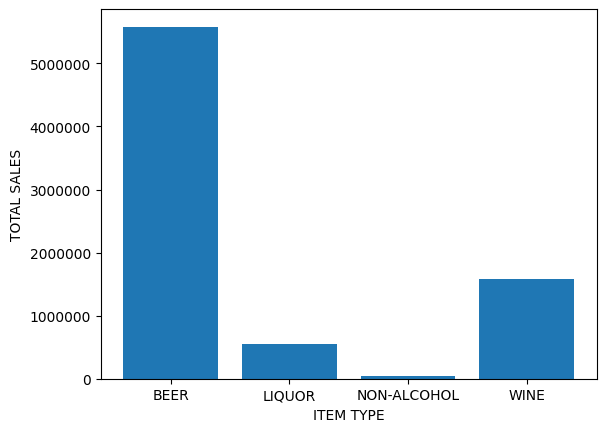

In [ ]:
TOTAL_SALES_BY_ITEM= df.groupby('ITEM TYPE')['TOTAL_SALES'].sum()

plt.bar(TOTAL_SALES_BY_ITEM.index.astype(str),TOTAL_SALES_BY_ITEM.values)

plt.xlabel('ITEM TYPE')
plt.ylabel('TOTAL SALES')
plt.ticklabel_format(style='plain', axis='y')
plt.show()


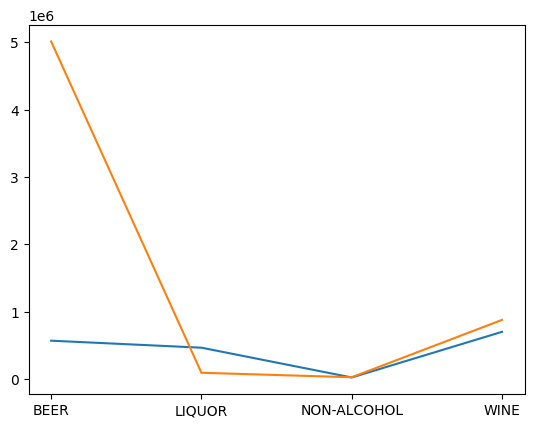

In [ ]:
total_retail_sales_by_item = df.groupby('ITEM TYPE')['RETAIL SALES'].sum()
total_warehouse_sales_by_item = df.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum()

plt.plot(total_retail_sales_by_item.index.astype(str), total_retail_sales_by_item.values)
plt.plot(total_warehouse_sales_by_item.index.astype(str), total_warehouse_sales_by_item.values)
plt.show()


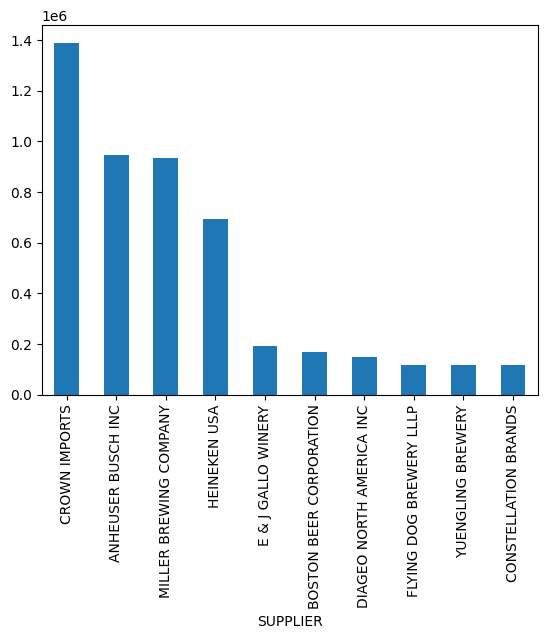

In [ ]:
sorted_totalsupplier_sales.head(10).plot(kind='bar')
plt.show()